# Natural Language Processing (NLP) Assignment


## 1. Import Required Libraries:

In [50]:

import nltk
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize

## 2. Download NLTK Resources:

In [51]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zelalem.wubet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zelalem.wubet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\zelalem.wubet\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\zelalem.wubet\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zelalem.wubet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
import nltk
print(nltk.data.path)  # Check where NLTK is looking for data

['C:\\Users\\zelalem.wubet/nltk_data', 'e:\\Job\\.env\\nltk_data', 'e:\\Job\\.env\\share\\nltk_data', 'e:\\Job\\.env\\lib\\nltk_data', 'C:\\Users\\zelalem.wubet\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', '/your/custom/path/to/nltk_data', 'e:\\Job\\.env\\nltk_data', '.env/share/nltk_data', '.env/share/nltk_data']


## 3. Text Preprocessing

### Define the Preprocessing Function:

In [53]:
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # Convert to lowercase and process with spaCy
    doc = nlp(text.lower())
    
    # Extract tokens that are:
    # - alphabetic (no punctuation/numbers)
    # - not stopwords
    # - not whitespace
    cleaned_tokens = [
        token.text for token in doc 
        if token.is_alpha and not token.is_stop and not token.is_space
    ]
    
    return cleaned_tokens


### Preprocess Sample Text:

In [54]:
text = "Natural Language Processing is a fascinating field."
cleaned_tokens = preprocess(text)
print(cleaned_tokens)

['natural', 'language', 'processing', 'fascinating', 'field']


## 4. Tokenization and N-grams


In [55]:
from nltk import ngrams
bigrams = list(ngrams(cleaned_tokens, 2))
print("Bigrams:", bigrams)

Bigrams: [('natural', 'language'), ('language', 'processing'), ('processing', 'fascinating'), ('fascinating', 'field')]


## 5. Named Entity Recognition (NER)

In [56]:
nlp = spacy.load("en_core_web_sm")
sentence = "Barack Obama was born in Hawaii."
doc = nlp(sentence)
for ent in doc.ents:
    print(ent.text, ent.label_)

Barack Obama PERSON
Hawaii GPE


## 6. Converting Text to Numbers

In [57]:
sentences = ["I love machine learning.", "Natural language processing is a part of AI.", "AI is the future."]

count_vec = CountVectorizer()
X_count = count_vec.fit_transform(sentences)
print("Count Vectorizer Output:\n", X_count.toarray())

tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(sentences)
print("\nTF-IDF Vectorizer Output:\n", X_tfidf.toarray())

Count Vectorizer Output:
 [[0 0 0 0 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 0 0 1 1 1 1 0]
 [1 1 1 0 0 0 0 0 0 0 0 1]]

TF-IDF Vectorizer Output:
 [[0.         0.         0.         0.         0.57735027 0.57735027
  0.57735027 0.         0.         0.         0.         0.        ]
 [0.30650422 0.         0.30650422 0.40301621 0.         0.
  0.         0.40301621 0.40301621 0.40301621 0.40301621 0.        ]
 [0.42804604 0.5628291  0.42804604 0.         0.         0.
  0.         0.         0.         0.         0.         0.5628291 ]]


## 7. Word Embeddings

In [49]:

nlp = spacy.load("en_core_web_md")

word = nlp("machine")[0]
print("Vector for 'machine':\n", word.vector)

Vector for 'machine':
 [-0.72883    0.20718   -0.0033379 -0.0027673 -0.17204    0.023277
  0.1297    -0.2112     0.32876    0.67447    0.10047   -0.30559
  0.11213    0.22959   -0.32997    0.1389    -0.57289    2.523
 -0.32921    0.06045    0.23895    0.1091     0.19358   -0.1765
  0.11583    0.63204   -0.13644   -0.24354    0.20061   -0.50244
  0.40537   -0.38688    0.73784    0.093937  -0.30643    0.045874
  0.097915  -0.082114   0.13082   -0.039022   0.088084  -0.27023
 -0.077658  -0.0045355  0.18986   -0.063083  -0.138      0.40474
 -0.16199   -0.10953    0.22923   -0.67634   -0.65763   -0.044595
 -0.12119    0.071167   0.25993   -0.27052   -0.22474   -0.13818
  0.20692    0.87604   -0.35257   -0.1498     0.72804    0.68768
  0.19993    0.084733  -0.2234     0.11301    0.29895   -0.090119
  0.038172  -0.32912    0.014221  -0.36335    0.5898     0.10467
  0.16549    0.47199    0.078939  -0.19985    0.84014   -0.2277
 -0.22907   -0.26243   -0.32598    1.0146    -0.079235  -0.34248
  

## 8. Sentiment Analysis

In [58]:
from textblob import TextBlob

text = "Natural Language Processing is amazing!"
blob = TextBlob(text)
print("Sentiment:", blob.sentiment)

Sentiment: Sentiment(polarity=0.42500000000000004, subjectivity=0.65)


## 9. Text Classification

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Expanded dataset
data = [
    "I love NLP",
    "I hate bugs",
    "Coding is fun",
    "Python is great for data science",
    "I dislike debugging",
    "Machine learning is fascinating",
    "I enjoy programming",
    "I can't stand slow computers",
    "Data analysis is interesting",
    "I love solving problems",
    "I hate it when code doesn't work",
    "Building models is exciting",
    "I find coding tedious at times"
]
labels = [
    "positive",  # I love NLP
    "negative",  # I hate bugs
    "positive",  # Coding is fun
    "positive",  # Python is great for data science
    "negative",  # I dislike debugging
    "positive",  # Machine learning is fascinating
    "positive",  # I enjoy programming
    "negative",  # I can't stand slow computers
    "positive",  # Data analysis is interesting
    "positive",  # I love solving problems
    "negative",  # I hate it when code doesn't work
    "positive",  # Building models is exciting
    "negative"   # I find coding tedious at times
]



In [63]:
# Create and train the model
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(data, labels)



Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [64]:
# Test the model with a new example
print(model.predict(["I enjoy learning new programming languages"]))

['positive']


## 10. Visualizations

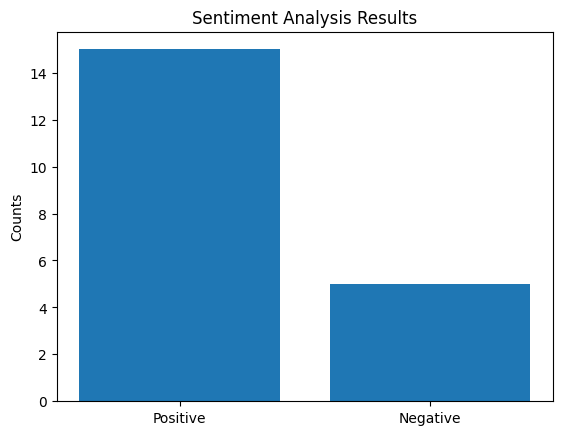

In [65]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Positive', 'Negative']
counts = [15, 5]

plt.bar(categories, counts)
plt.title('Sentiment Analysis Results')
plt.ylabel('Counts')
plt.show()